<a href="https://colab.research.google.com/github/Shagun2004-dev/AI-DS-projects/blob/main/Customer%20Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New Section

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [108]:
#loading dataset from csv files
df = pd.read_csv("/content/Mall_Customers.csv")

In [109]:
#information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


Choosing Annual Income column and Spending Score column

In [114]:
X = df.iloc[:,[3,4]].values

Choosing number of clusters

WCSS: Within Cluster Sum of Squares

In [115]:
#finding wcss value for different number of clusters

wcss = []

k_values = range(1, 10)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=11)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

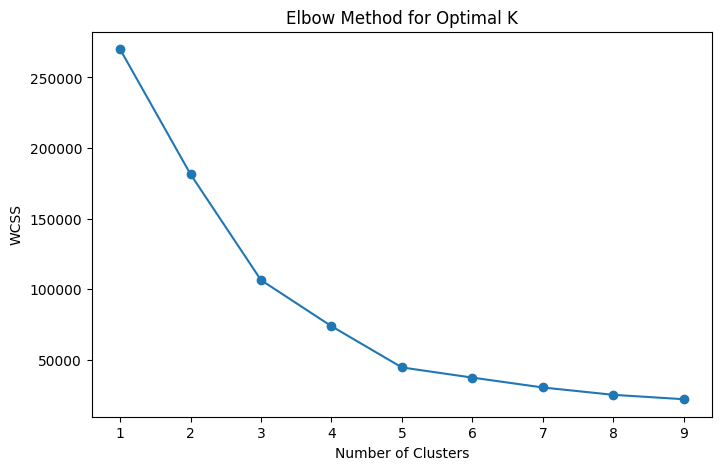

In [116]:
# Plot the Elbow Method graph

plt.figure(figsize=(8,5))
plt.plot(k_values, wcss, marker='o', linestyle='-')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal K')
plt.show()

Optimum number of Clusters=5

Training the K-Means Cluster model

In [117]:
# Choose the optimal number of clusters

k_optimal = 5
kmeans = KMeans(n_clusters=k_optimal, random_state=42, n_init=10)

Y = kmeans.fit_predict(X)


Visualizing the Clusters

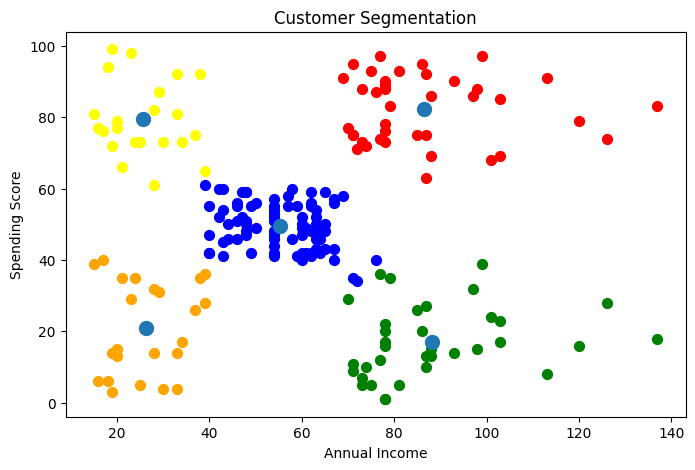

In [118]:
# Plotting the Clusters

plt.figure(figsize=(8,5))
plt.scatter(X[Y==0,0], X[Y==0,1], s=50, c="BLUE",  label="cluster1")
plt.scatter(X[Y==1,0], X[Y==1,1], s=50, c="RED",   label="cluster2")
plt.scatter(X[Y==2,0], X[Y==2,1], s=50, c="YELLOW",label="cluster3")
plt.scatter(X[Y==3,0], X[Y==3,1], s=50, c="GREEN", label="cluster4")
plt.scatter(X[Y==4,0], X[Y==4,1], s=50, c="ORANGE",label="cluster5")
plt.scatter(X[Y==5,0], X[Y==5,1], s=50, c="VIOLET",label="cluster6")

#plot the centroid
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100,  label='centroids')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Customer Segmentation')
plt.show()
